In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_path = "/home/data/m5data"

calender = pd.read_csv(os.path.join(data_path,'calendar.csv'))
sales_train_evalutaion = pd.read_csv(os.path.join(data_path,'sales_train_evaluation.csv'))
sales_train_validation = pd.read_csv(os.path.join(data_path,'sales_train_validation.csv'))
sample_submission = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
sell_prices = pd.read_csv(os.path.join(data_path,'sell_prices.csv'))

### After loading all the dataset we will do analysis on state wise data
#### lets create a variable name ste_ca and store california state

In [3]:
ste_ca = sales_train_evalutaion[sales_train_evalutaion['state_id']=='CA'].copy()

# lets check for missing values

print("Missing Values:" +str(ste_ca.isna().sum().sum()))
ste_ca.head(10)

Missing Values:0


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
5,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,0,0,1,0,0,5,2,0
6,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,7,0,6,0,15,5,4,1,40,32
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,0,0,0,0,0,1,0
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,0,0,1,0,2,1,1,0,0,1


##### This dataframe offers insights into the selling prices of multiple products across various shops, with the pricing altering on a weekly basis. We have filtered the data specifically for stores located in California.

##### Subsequently, we will transform the wide format dataframe 'ste_ca' into a long format dataframe. This allows us to consolidate data from both the calendar and sell_prices into a single, comprehensive dataframe.

In [5]:
ste_ca_melted=ste_ca.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
ste_ca_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)
ste_ca_melted.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


### Melting the dataset to use it in analysis 

###### Joining Various Datasets

In [6]:
ca_joined = pd.merge(calender, ste_ca_melted, how="right", left_on=("d"), right_on="Day")
ca_joined=pd.merge(ca_joined,sell_prices,how="left",on=["store_id","item_id","wm_yr_wk"])
ca_joined.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_WI,id,item_id,dept_id,cat_id,store_id,state_id,Day,Quantity,sell_price
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
4,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
5,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
6,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NaN
7,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,0.46
8,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,1.56
9,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,...,0,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,3.17


In [7]:
ca_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23672436 entries, 0 to 23672435
Data columns (total 23 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   wm_yr_wk      int64  
 2   weekday       object 
 3   wday          int64  
 4   month         int64  
 5   year          int64  
 6   d             object 
 7   event_name_1  object 
 8   event_type_1  object 
 9   event_name_2  object 
 10  event_type_2  object 
 11  snap_CA       int64  
 12  snap_TX       int64  
 13  snap_WI       int64  
 14  id            object 
 15  item_id       object 
 16  dept_id       object 
 17  cat_id        object 
 18  store_id      object 
 19  state_id      object 
 20  Day           object 
 21  Quantity      int64  
 22  sell_price    float64
dtypes: float64(1), int64(8), object(14)
memory usage: 4.2+ GB


#### Joined the sales dataset with Calender Dataset and also sell_prices dataset

In [8]:
#dropping columns not related to california state
ca_joined.drop(["snap_TX","snap_WI"],axis=1,inplace=True)
ca_joined["total_sales"]=ca_joined["Quantity"]*ca_joined["sell_price"]

#### Calculating daily total sale value for each product at each store.

In [10]:
CA_store_daily=ca_joined.groupby(["store_id","date"],as_index=False).agg(Total_sales=("total_sales","sum"))
CA_store_daily["date"]=pd.to_datetime(CA_store_daily["date"])
CA_combined=CA_store_daily.pivot(index="date",columns="store_id",values="Total_sales")
CA1,CA2,CA3,CA4=[CA_store_daily[CA_store_daily["store_id"]==i].copy() for i in ["CA_1","CA_2","CA_3","CA_4"]]

In [11]:
print("CA1", CA1.info())
print("CA_combined", CA_combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   store_id     1941 non-null   object        
 1   date         1941 non-null   datetime64[ns]
 2   Total_sales  1941 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 60.7+ KB
CA1 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2011-01-29 to 2016-05-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CA_1    1941 non-null   float64
 1   CA_2    1941 non-null   float64
 2   CA_3    1941 non-null   float64
 3   CA_4    1941 non-null   float64
dtypes: float64(4)
memory usage: 75.8 KB
CA_combined None


In [13]:
CA_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2011-01-29 to 2016-05-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CA_1    1941 non-null   float64
 1   CA_2    1941 non-null   float64
 2   CA_3    1941 non-null   float64
 3   CA_4    1941 non-null   float64
dtypes: float64(4)
memory usage: 75.8 KB


#### Calculating daily total sales for each store. Creating a new combined wideformat dataframe, where store_id are the columns, and cell contain daily total sale value for that store.

In [14]:
for i in [CA1,CA2,CA3,CA4]:
    i.set_index("date",inplace=True)
    i.index.freq="D"

#### Calculating Monthly sales for all stores.

In [15]:
CA_monthly=CA_combined.resample("MS").sum()
CA_monthly_ind=[]
for i in [CA1,CA2,CA3,CA4]:
    CA_monthly_ind.append(i["Total_sales"].resample("MS").sum())
CA_monthly_long=CA_store_daily.set_index("date").groupby(["store_id"])["Total_sales"].resample("MS").sum().reset_index()

In [19]:
import datetime
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Monthly Sale From Jan-2011 to May-2016')

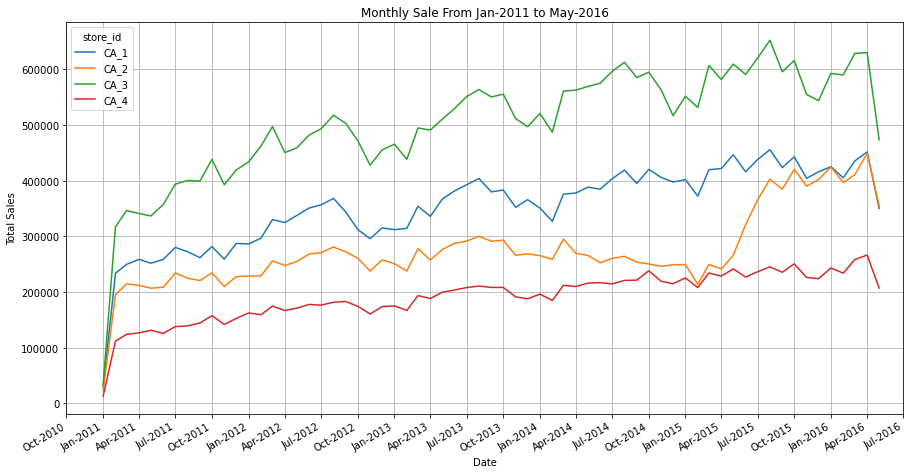

In [20]:
CA_monthly.plot(legend=True,
                figsize=(15,8),
                xlim=[datetime.datetime(2010,10,1),datetime.datetime(2016,7,1)],
                grid=True,
                ylabel="Total Sales",
                xlabel="Date",
                x_compat=True)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_title("Monthly Sale From Jan-2011 to May-2016")

#### The graph provides several key insights:

1. A noticeable surge in sales is seen between January 2011 and February 2011. This anomaly arises due to the fact that sales data for January 2011 is available only for 3 days. Consequently, the sales for different stores in January nearly hit zero.

2. Similarly, a sudden decrease in sales is observed in May 2016 across all stores. This can likely be attributed to the fact that the dataset lacks data for 8 days in the month of May 2016.

3. To rectify these irregularities and ensure that such cases of incomplete data do not influence our models, we need to exclude the data for the months of January 2011 and May 2016.

4. Apart from CA2, all other stores demonstrate an upward trend in total monthly sales year over year, which suggests a generally increasing sales pattern.

5. Seasonality is also visible in the data.

6. As for CA2, the trend remains fairly constant until July 2015, following which a sudden surge is observed.

In [21]:
for i in range(4):
    CA_monthly_ind[i]=CA_monthly_ind[i].loc["02-2011":"04-2016"].copy()
CA_monthly=CA_monthly.loc["02-2011":"04-2016"].copy()
CA_monthly_long=CA_monthly_long.set_index("date").loc["02-2011":"04-2016"]

In [25]:
CA_monthly.to_excel(data_path + "/output/" + "CA__monthly.xlsx")
for j,i in enumerate(CA_monthly_ind):
    i.to_excel("CA_"+str(j+1)+".xlsx")
CA_monthly_long.to_excel(data_path + "/output/" + "CA__monthly_long.xlsx")

##### Exporting files to excel, so the above computing intensive data preparation steps can be skipped after data preparation is done for the first time.

In [26]:
print("Length of the full dataset:"+str(len(CA_monthly.index.unique())))

Length of the full dataset:63


### Spliting Train and test

Before we proceed with further analysis, it's essential to partition the dataset into training and testing data. All activities related to exploratory data analysis (EDA), model fitting, and selection will be performed using only the training data to prevent any bias. The testing data will be utilized solely post this phase.

Ideally, we require a minimum of 3-4 complete seasonal cycles for the training phase. The test data should be at least equivalent to the forecasting horizon. Our dataset encompasses 63 months of data, and our goal is to predict six months ahead following April 2016.

Given that a year consists of 12 months, the duration of one full cycle is 12 months.

Considering these factors, we'll allocate the initial 54 months of data for training, which encapsulates over four full seasonal cycles. Subsequently, the concluding 9 months of data will constitute our testing data.

In [28]:
CA_monthly_ind=[]
CA_monthly=pd.read_excel(data_path + "/output/" + "CA__monthly.xlsx",parse_dates=True).set_index("date")
CA_monthly.index.freq="MS"
CA1=pd.read_excel("CA_1.xlsx",parse_dates=True).set_index("date")
CA2=pd.read_excel("CA_2.xlsx",parse_dates=True).set_index("date")
CA3=pd.read_excel("CA_3.xlsx",parse_dates=True).set_index("date")
CA4=pd.read_excel("CA_4.xlsx",parse_dates=True).set_index("date")
CA_monthly_long=pd.read_excel(data_path + "/output/" + "CA__monthly_long.xlsx",parse_dates=True).set_index("date")
for i in [CA1,CA2,CA3,CA4]:
    CA_monthly_ind.append(i["Total_sales"])

In [29]:
Train=CA_monthly[:-9]
Test=CA_monthly[-9:]
Train_ind=[i[:-9] for i in CA_monthly_ind]
Test_ind=[i[-9:] for i in CA_monthly_ind]
Train_long=CA_monthly_long.loc["02-2011":"07-2015"]
Test_long=CA_monthly_long.loc["08-2015":]

## Exploratory Data Analysis

#### Rolling Mean and Sales

In [31]:
import seaborn as sns

Text(0.5, 0.98, 'Monthly Sale And Rolling Mean')

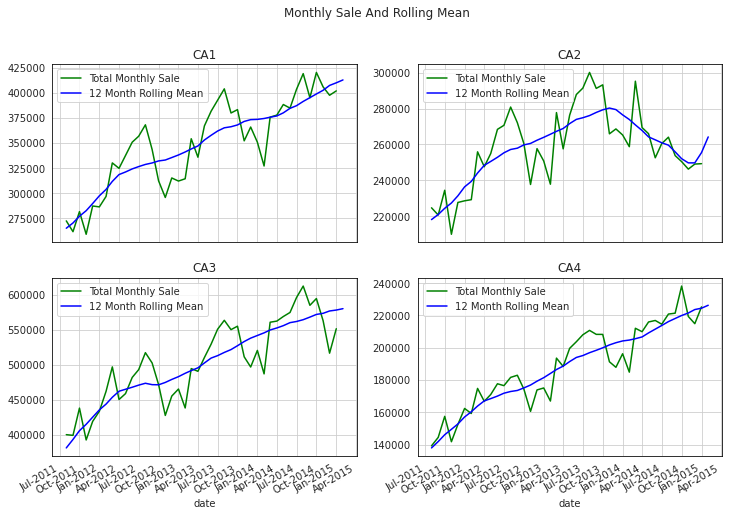

In [32]:
sns.set_style("whitegrid",{"axes.edgecolor": "black"})
fig, axes = plt.subplots(figsize=(12,8),nrows=2, ncols=2,sharex=True)
k=0;
for i in range(2):
    for y in range(2):
        Train_ind[k][6:-6].plot(legend=True,label="Total Monthly Sale",color="green",ax=axes[i][y],grid=True,x_compat=True,title="CA"+str(k+1))
        Train_ind[k].rolling(12,center=True).mean().plot(legend=True,color="blue",label="12 Month Rolling Mean",ax=axes[i][y],grid=True,x_compat=True)
        axes[i][y].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        axes[i][y].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
        k=k+1
fig.suptitle("Monthly Sale And Rolling Mean")

There's a noticeable seasonal trend where sales peak for CA1, CA3, and CA4 between July and October each year. For CA2, the sales pattern is more irregular, with sales peaking from July to October for two years, and from January to April for another year.

The trend for CA1, CA3, and CA4 is ascending. For CA2, the trend shows an increase up until December 2013, after which a declining trend is observed.

These trends are being analyzed using a Rolling Mean.

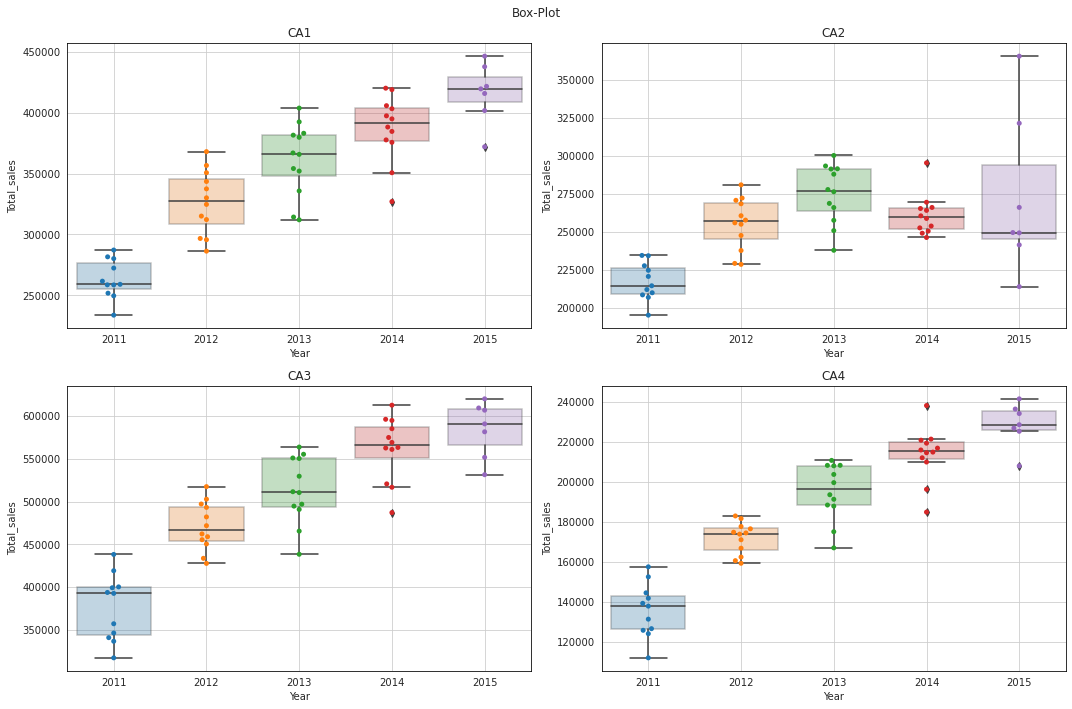

In [33]:
fig, ax = plt.subplots(figsize = (15,10),nrows=2,ncols=2)
for i in range(4):
    sns.boxplot(x=Train_ind[i].index.year.tolist(),y=Train_ind[i] ,ax=ax[int(i/2)][i%2], boxprops=dict(alpha=.3));
    sns.swarmplot(y=Train_ind[i],ax=ax[int(i/2)][i%2] ,x=Train_ind[i].index.year.tolist())
    ax[int(i/2)][i%2].set_title("CA"+str(i+1))
    ax[int(i/2)][i%2].grid(True)
    ax[int(i/2)][i%2].set_xlabel("Year")
fig.suptitle("Box-Plot")
fig.tight_layout()

The average sales over the years are increasing for all stores, excluding CA2. In 2014, all stores experienced anomalies. Apart from this, no other outliers are identified.

For CA1 and CA3, the distribution fluctuates less over the years, as depicted by the minimal changes in the length of the box plot between 2011 and 2015.

In the case of CA2, the total monthly sale value underwent significant variation in 2015 and showed a higher concentration in 2014. This is in line with the horizontal line observed for the CA2 store in the graph titled "Monthly Sale From Jan-2011 to May-2016".

For CA4, the total monthly sales are seen to be more concentrated in the years 2014 and 2015.

### Monthly trends & distrbution
##### Monthly Subseries Plot

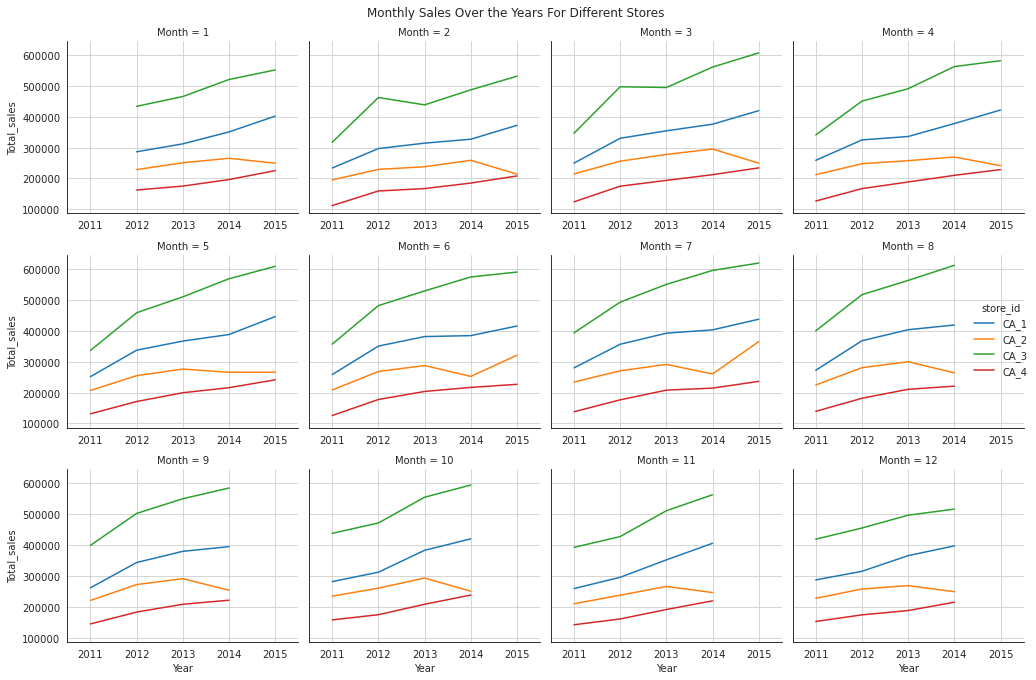

In [34]:
Train_ss=Train_long.copy()
Train_ss["Year"]=Train_ss.index.year.tolist()
Train_ss["Month"]=Train_ss.index.month.tolist()
fg_grid=sns.relplot(data=Train_ss.reset_index(),
                x="Year",
                hue="store_id",
                y="Total_sales",
                col="Month",
                kind="line",
                col_wrap=4,
                height=3.2,
                aspect=1.06,
                facet_kws={"sharex":False,"xlim":(2010.5,2015.5),"sharey":True}
).figure.suptitle("Monthly Sales Over the Years For Different Stores")
fg_grid.figure.tight_layout()

##### For all stores, with the exception of CA2, sales are on an upward trend for each month year over year.

## Distribution Plot

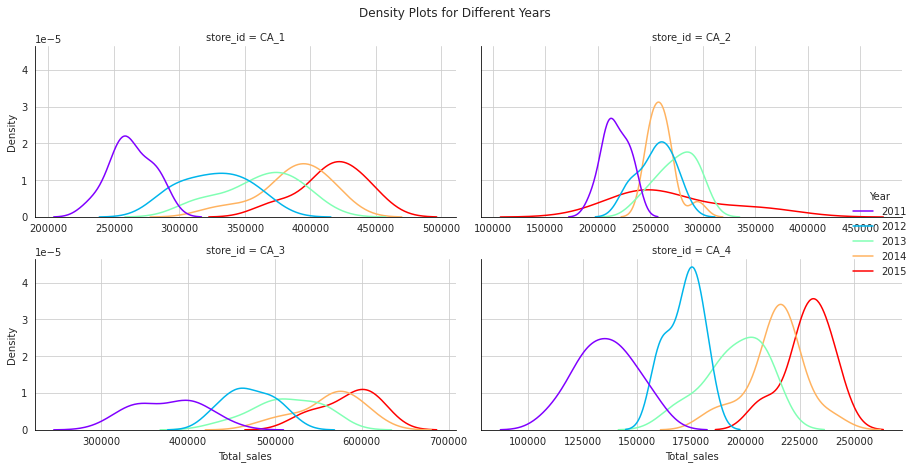

In [35]:
fg_grid=sns.displot(data=Train_ss.reset_index(),
            x="Total_sales",
            kind="kde",
            col="store_id",
            col_wrap=2,
            palette="rainbow",
            hue="Year",
            legend=True,
            facet_kws={"sharex":False},
            height=3.3,
            aspect=1.8,
            common_norm=False).figure.suptitle("Density Plots for Different Years") 
fg_grid.figure.tight_layout()

##### The Kernel Density plot indicates that the data appears to follow a normal distribution, with the exceptions of CA2 and CA3, where a bi-modal distribution might be present due to a smaller sample size. The rightward shift of the peaks from 2011 to 2015 suggests an increase in the average.

## Heat-Map

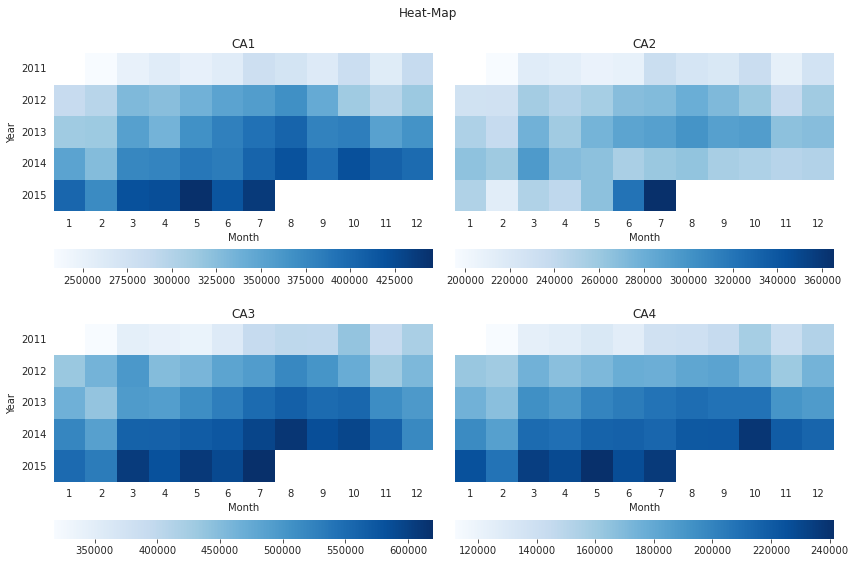

In [36]:
fig, axes = plt.subplots(figsize=(12,8),nrows=2, ncols=2,sharey=True)
p=pd.pivot_table(data=Train_ss[["store_id","Total_sales","Month","Year"]], 
                 index=["store_id","Year"],
                 columns="Month",
                 values="Total_sales")
k=0;
for i in range(2):
    for y in range(2):
        k=k+1
        t=sns.heatmap(p.loc["CA_"+str(k)],
                    square=True,
                    cmap='Blues',
                    ax=axes[i][y],
                    cbar=True,
                    cbar_kws={"orientation":"horizontal"});
        axes[i][y].set_title("CA"+str(k))
        axes[i][y].tick_params('y', labelrotation=0) 
        if y==1: axes[i][y].set_ylabel(None) 
# mappable = t.get_children()[0]
# plt.colorbar(mappable, ax =[axes[2][0],axes[2][1]],use_gridspec=True,orientation = 'horizontal')
fig.suptitle("Heat-Map")
fig.tight_layout()

You can generally see that shade gets darker between 7th Month (July) and 10th Month (October) for all the years. This confirms that sales peaks between July and October, and then decreases slightly. There is also smaller peak in sales which comes in 3rd month(March).

### Stacked Bar Graph-Each Month Share in Total Sales

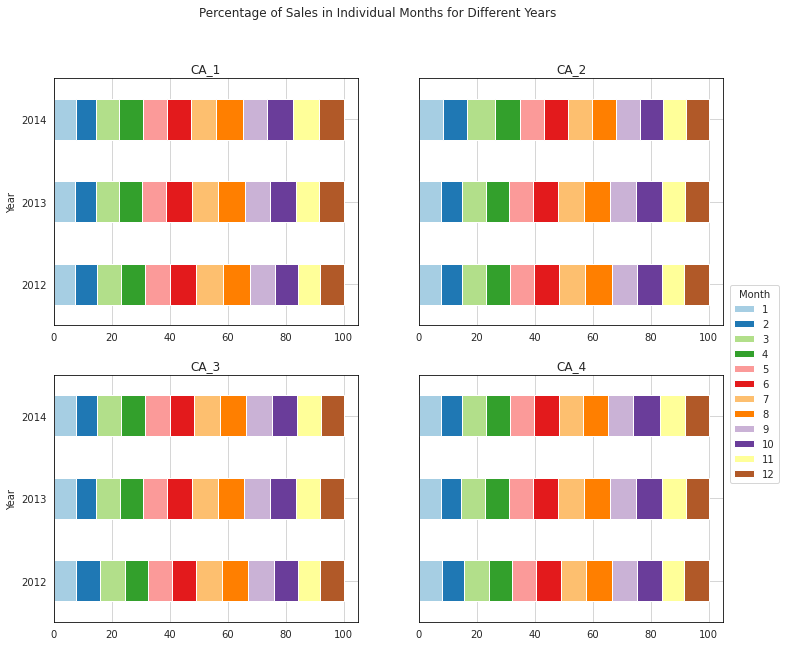

In [37]:
fig,ax=plt.subplots(figsize=(12,10),nrows=2,ncols=2,sharey=True)
for j in range(4): 
        sum_of_years=p.loc["CA_"+str(j+1)].loc[2012:2014].sum(axis=1)
        p_percentage=p.loc["CA_"+str(j+1)].loc[2012:2014].divide(sum_of_years,axis=0)*100
        p_percentage.plot(kind='barh', stacked=True, title="CA_"+str(j+1),ax=ax[int(j/2)][j%2],legend=False,colormap="Paired")
handles, labels = ax[0][0].get_legend_handles_labels()
fig.suptitle("Percentage of Sales in Individual Months for Different Years")
fig.legend(handles, labels,bbox_to_anchor=(0.97,0.6),title="Month")
plt.show()

Percentage wise all months conribute roughly the same to total sales in the year. They all contribute approximately 7.5% to 8.5% to total sales in year

## Decomposition

In [38]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot

CA_1 
 p-value : 0.0014119461946460908 
Since p < 0.05 = True, The residuals are uncorelated
CA_2 
 p-value : 0.0029624633711649024 
Since p < 0.05 = True, The residuals are uncorelated
CA_3 
 p-value : 0.35847785660449166 
Since p < 0.05 = False, The resisuals are co-related
CA_4 
 p-value : 0.003899698329165501 
Since p < 0.05 = True, The residuals are uncorelated


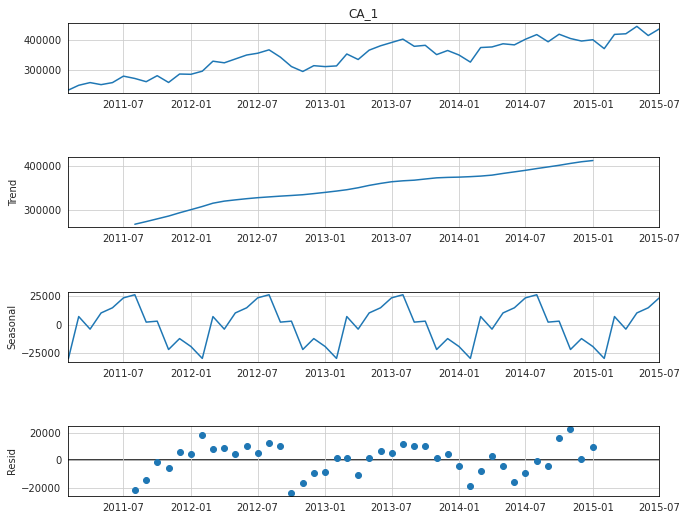

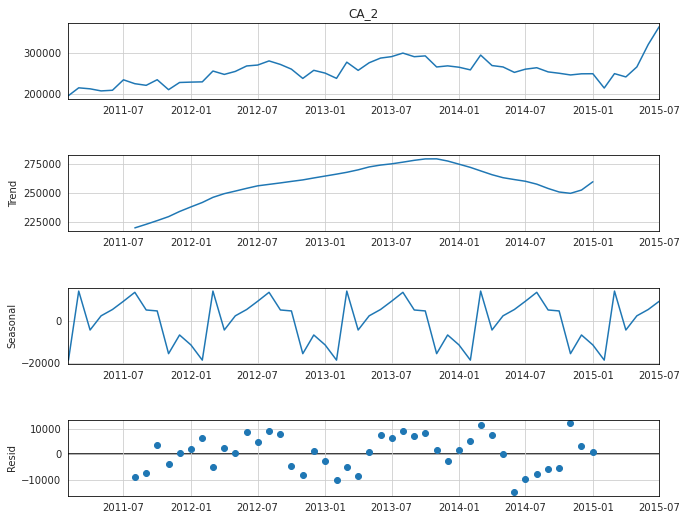

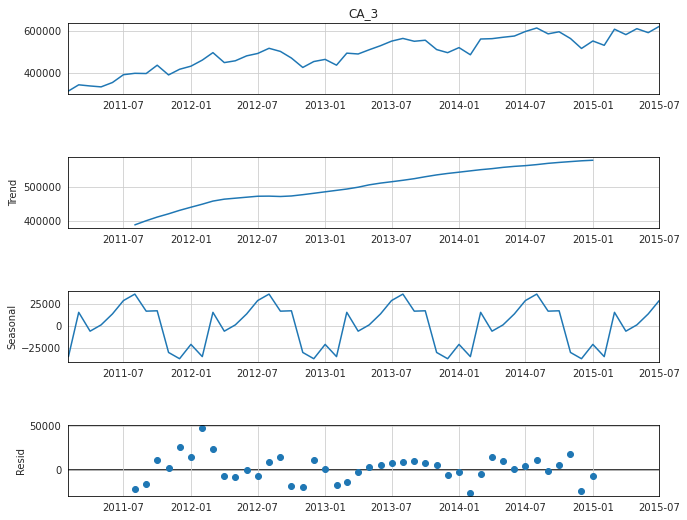

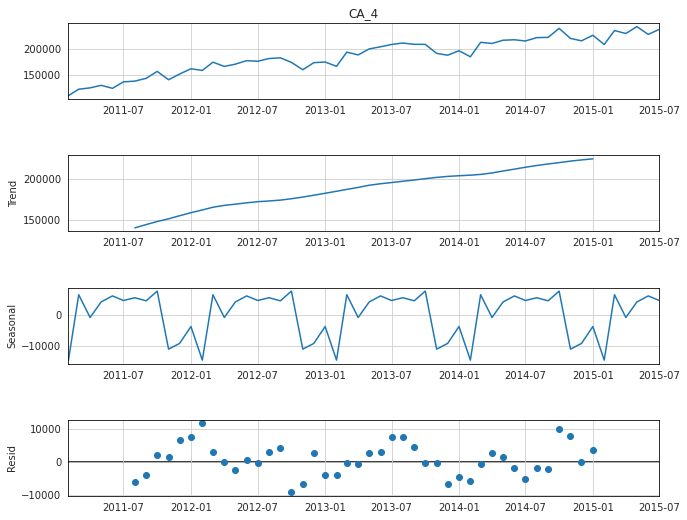

In [40]:

decompose_dict = {}

state_id_list = ['CA_1', 'CA_2', 'CA_3', 'CA_4']

for ca in state_id_list:
    decompose_dict[ca] = seasonal_decompose(Train[ca])
    decompose_dict[ca].plot().set(figheight=8.1,figwidth=10.8)
    ljung_p = np.mean(ljung(decompose_dict[ca].resid.dropna(),lags=24,return_df=True)["lb_pvalue"])
    print(ca,"\n","p-value :",ljung_p, "\nSince p < 0.05 =",str(ljung_p<0.05)+","
      ,"The residuals are uncorelated" if ljung_p<0.05 else "The resisuals are co-related")


## Stationarity

In [43]:
from statsmodels.tsa.stattools import adfuller

**** CA_1 ****
Standard Deviation: 56545.05960702291
Coefficient of Variation: 0.16313931463012166
p value:0.2654 , Series is Non-Stationary
p value:0.1305 , Series is Non-Stationary
p value:0.0 , Series is Stationary
**** CA_2 ****
Standard Deviation: 30762.858830483874
Coefficient of Variation: 0.12047514965508119
p value:0.5276 , Series is Non-Stationary
p value:0.5128 , Series is Non-Stationary
p value:0.0 , Series is Stationary
**** CA_3 ****
Standard Deviation: 79672.36475390568
Coefficient of Variation: 0.1605983240992905
p value:0.1219 , Series is Non-Stationary
p value:0.2033 , Series is Non-Stationary
p value:0.0 , Series is Stationary
**** CA_4 ****
Standard Deviation: 33781.02481189229
Coefficient of Variation: 0.18128177231889392
p value:0.2249 , Series is Non-Stationary
p value:0.1108 , Series is Non-Stationary
p value:0.0 , Series is Stationary


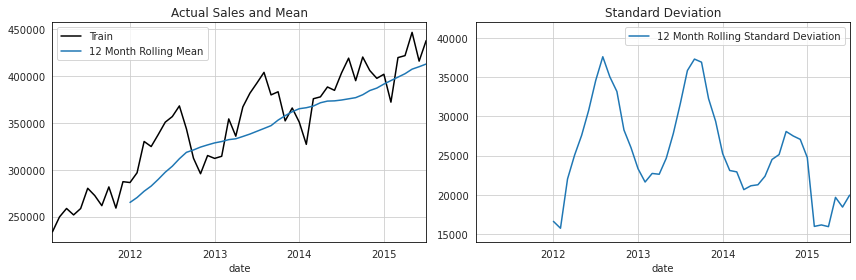

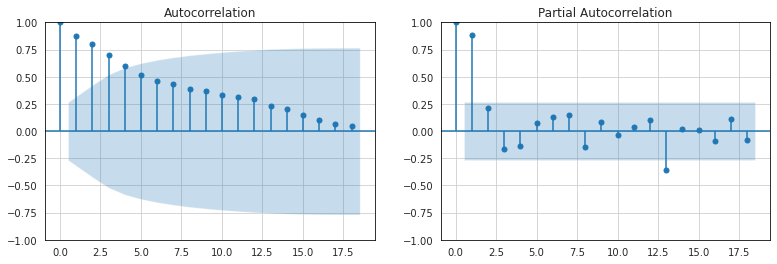

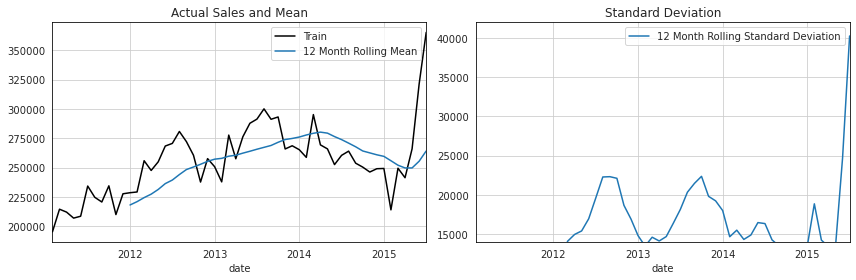

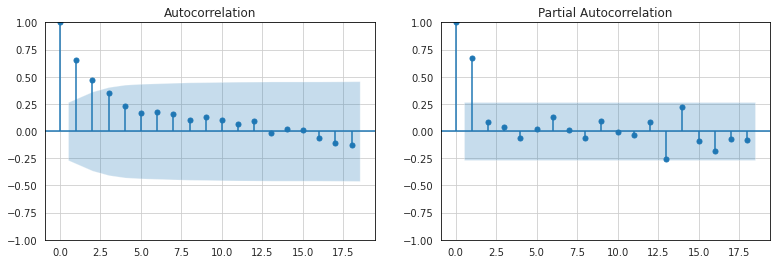

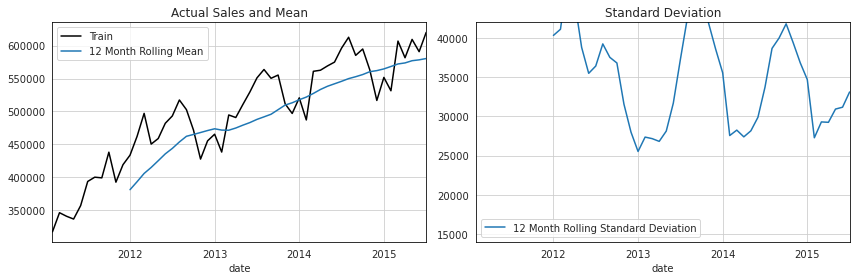

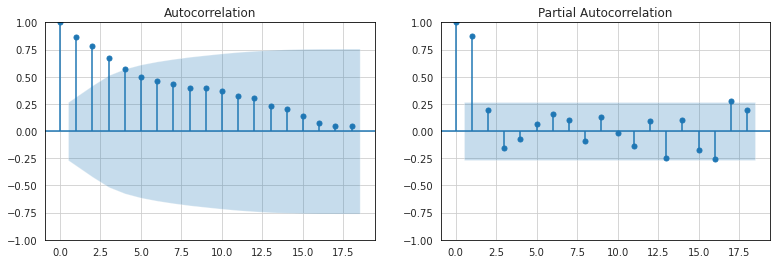

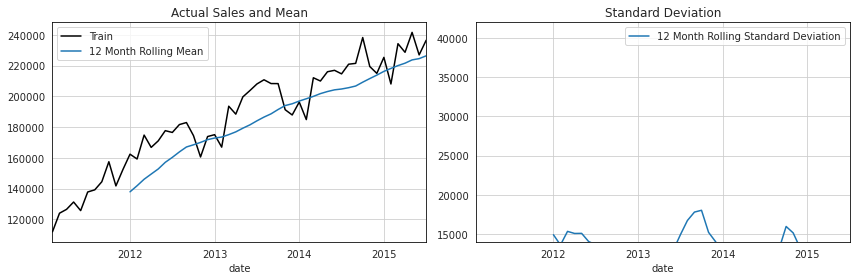

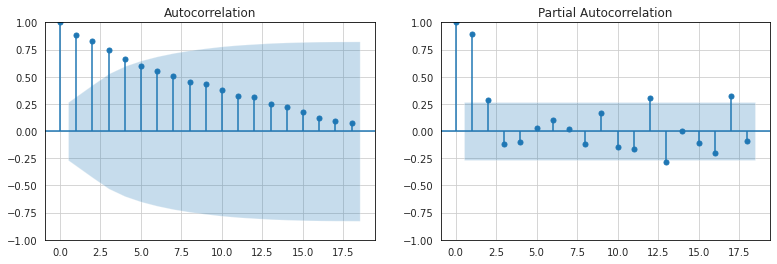

In [45]:
for ca in state_id_list:
    print("****", ca, "****")
    fig,ax1=plt.subplots(figsize=(12,4),nrows=1,ncols=2)
    Train[ca].plot(ax=ax1[0],legend=True,label="Train",cmap="gray",title="Actual Sales and Mean")
    Train[ca].rolling(12,center=False).mean().plot(legend=True,ax=ax1[0],label="12 Month Rolling Mean")
    Train[ca].rolling(12,center=False).std().plot(ax=ax1[1],title="Standard Deviation",ylim=(14000,42000),label="12 Month Rolling Standard Deviation",legend=True)
    fig.tight_layout()
    print("Standard Deviation:",Train[ca].std())
    print("Coefficient of Variation:",Train[ca].std()/Train[ca].mean())
    fig,ax1=plt.subplots(figsize=(13,4),nrows=1,ncols=2)
    plot_acf(Train[ca],ax=ax1[0]);
    plot_pacf(Train[ca],ax=ax1[1]);
    adf = adfuller(Train[ca])[1]
    print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")
    adf2 = adfuller(Train[ca].diff(1).dropna())[1]
    print(f"p value:{adf2.round(4)}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
    adf2 = adfuller(Train[ca].diff(1).diff(1).dropna())[1]
    print(f"p value:{adf2.round(4)}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")

In [47]:
from scipy.stats import jarque_bera as jb

In [48]:
is_norm=pd.DataFrame(columns=["store_id","jb_p_value","Distribution"])
for i in state_id_list:
    p_value=jb(Train[i])[1]
    is_norm=pd.concat([is_norm,
               pd.DataFrame([{"store_id":i,
                              "jb_p_value":p_value,
                              "Distribution":"Normal" if p_value>0.05 else "Not Normal"}]
                           )],
               ignore_index=True)
print(is_norm)

  store_id  jb_p_value Distribution
0     CA_1    0.228322       Normal
1     CA_2    0.003159   Not Normal
2     CA_3    0.255755       Normal
3     CA_4    0.266695       Normal


While it's not necessary for a series to be Gaussian for precise forecasting, high skewness in the data can influence model selection and the certainty of the forecast.

To normalize our data, we can apply the Box-Cox transformation.

The Jarque-Bera test is used to determine if the data originates from a normal distribution.

The p-value from the Jarque-Bera test for the time series data of CA1, CA3, and CA4 indicates that they follow a normal distribution.

According to the Jarque-Bera test, the time series data for the CA2 store does not originate from a normal distribution.

## Model Fitting and Selection

In [61]:
from statsmodels.tools.eval_measures import rmse

In [49]:
def MAPE(y_true,y_pred):
    ytrue,ypred=np.array(y_true),np.array(y_pred)
    accuracy_df=pd.DataFrame()
    MAPE1=np.round(np.mean(np.abs(ytrue-ypred)/ytrue)*100,1)
    return MAPE1

def accuracy(y_true,y_pred):
    ytrue,ypred=np.array(y_true),np.array(y_pred)
    MAPE1=MAPE(y_true,y_pred)
    rmse_r=np.round(rmse(ytrue,ypred),1)
    return pd.DataFrame({"RMSE":[rmse_r],"MAPE":[MAPE1]})

def residualcheck(residuals, lags):
    
    resid_mean=np.mean(residuals)
    ljp_valve=np.mean(ljung(x=residuals,lags=lags,return_df=False)[1])
    adfuller1=adfuller(residuals)[1]
    isnorm=jb(residuals)[1]
    
    fig = plt.figure(figsize=(8,6))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout,(0,0),colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals,ax=kde_ax);
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", ljp_valve, "(>0.05, Uncorrelated)" if (ljp_valve > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(isnorm,3), "(>0.05, Normal)" if (isnorm>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", adfuller1, "(>0.05, Non-stationary)" if (adfuller1 > 0.05) else "(<0.05, Stationary)")
    

    return ts_ax, acf_ax, kde_ax

## SARIMA Models

In [52]:
from pmdarima import ARIMA, auto_arima

In [54]:
best_arima=[]
for i in state_id_list:    
    best_arima.append(
        auto_arima(Train[i],
                   seasonal=True,
                   m=12,
                   d=1,
                   nformation_criterion='aicc'
                  )
    )

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
predicted_SARIMA=pd.DataFrame(columns=state_id_list)
fit_SARIMA=pd.DataFrame(columns=state_id_list)
resid_SARIMA=pd.DataFrame(columns=state_id_list)
for j,i in enumerate(state_id_list):
    sarima_model=SARIMAX(endog=Train[i],
                          **best_arima[j].get_params()
                         )
    sarima_fit=sarima_model.fit(disp=0)
    start = len(Train)
    end = len(Train) +len(Test) -1
    fit_SARIMA[i] = sarima_fit.fittedvalues
    resid_SARIMA[i] = sarima_fit.resid[1:]
    predicted_SARIMA[i] = sarima_fit.predict(start, end, dynamic=False)


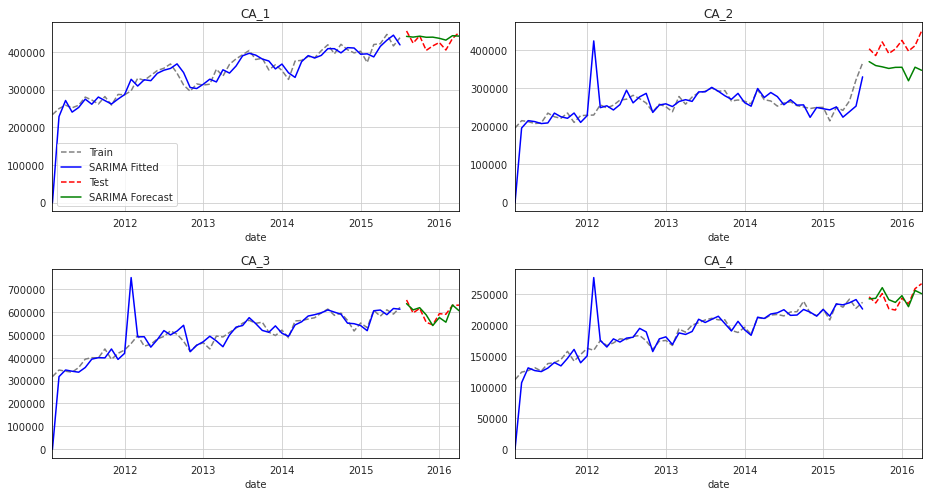

In [57]:
fig,ax=plt.subplots(figsize=(13,7),nrows=2,ncols=2)
for i, axs in enumerate(ax.flat):
    Train["CA_"+str(i+1)].plot(style="--", color="gray",legend=(i==0), label="Train",ax=axs).set_title(state_id_list[i])
    fit_SARIMA["CA_"+str(i+1)].dropna().plot(color="b",legend=(i==0) ,label="SARIMA Fitted",ax=axs)
    Test["CA_"+str(i+1)].plot(style="--",color="r", legend=(i==0),label="Test",ax=axs)
    predicted_SARIMA["CA_"+str(i+1)].plot(color="g",legend=(i==0) ,label="SARIMA Forecast",ax=axs)
fig.tight_layout()

In [58]:
Model_Performance=pd.DataFrame(columns=["store_id","Forecast Method","MAPE","RMSE"])

In [62]:
for i in state_id_list:
    model_name="SARIMA"
    temp=pd.DataFrame({"store_id":i,
                  "Forecast Method":model_name,
                  "MAPE":accuracy(Test[i],predicted_SARIMA[i]).MAPE,
                  "RMSE":accuracy(Test[i],predicted_SARIMA[i]).RMSE})
    Model_Performance=pd.concat([Model_Performance,temp],axis=0,ignore_index=True)

In [63]:
Model_Performance

,store_id,Forecast Method,MAPE,RMSE
0,CA_1,SARIMA,3.8,18787.2
1,CA_2,SARIMA,13.9,62055.6
2,CA_3,SARIMA,2.7,19955.4
3,CA_4,SARIMA,3.4,9538.2


In [64]:
best_arima[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood                -593.489
Date:                            Sun, 06 Aug 2023   AIC                           1200.978
Time:                                    08:07:27   BIC                           1214.770
Sample:                                02-01-2011   HQIC                          1206.281
                                     - 07-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1194      0.142     -7.884      0.000      -1.398      -0.841
ar.L2         -0.8512      0.131     -6.488      0.000      -1.108      -0.594
ma.L1          1.1354      0.199      5.694      0.000       0.745       1.526
ma.L2          0.9788      0.304      3.221      0.001       0.383       1.574
ma.S.L12       0.2033      0.069      2.931      0.003       0.067       0.339
ma.S.L24       0.0993      0.118      0.843      0.399      -0.132       0.330
sigma2      4.085e+08   5.97e-10   6.85e+17      0.000    4.09e+08    4.09e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.77   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.03   Prob(JB):                         0.85
Heteroskedasticity (H):               2.06   Skew:                            -0.05
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.41e+34. Standard errors may be unstable.
"""

You can view the summary of arima model selected by auto_arima function on calling .summary() method.
This will give us information such as order (p,d,q),(P,D,Q) for the model, Ljung box, Jarque Bera test results on residuals, as well as various metrics for checking model quality such as AICC,BIC and HQIC.



 Store Name CA_1
** Mean of the residuals:  1934.95

** Ljung Box Test, p-value: 0.0418330077604133 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.83 (>0.05, Normal)

** AD Fuller, p_value: 0.24922866222320994 (>0.05, Non-stationary)


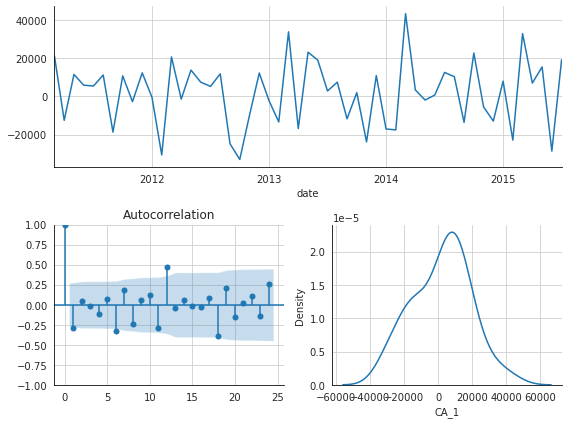


 Store Name CA_2
** Mean of the residuals:  -1691.06

** Ljung Box Test, p-value: 0.965162625450717 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 1.8123963465853475e-09 (<0.05, Stationary)


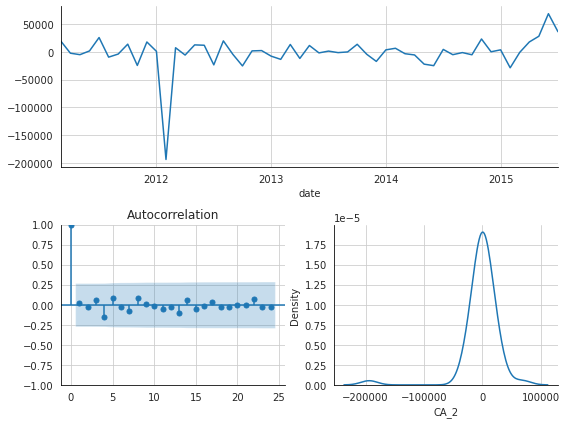


 Store Name CA_3
** Mean of the residuals:  -5523.66

** Ljung Box Test, p-value: 0.9011233260220282 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 2.810040076127105e-12 (<0.05, Stationary)


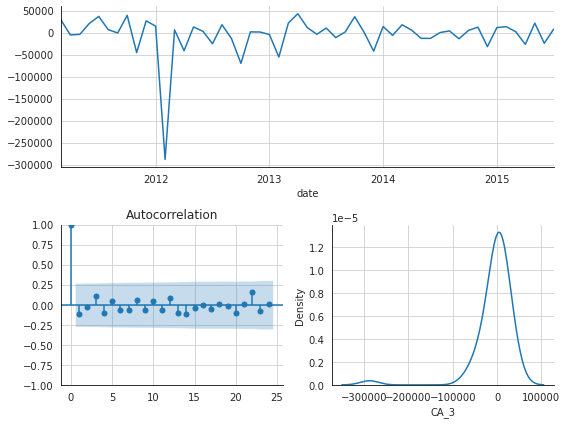


 Store Name CA_4
** Mean of the residuals:  -1638.22

** Ljung Box Test, p-value: 0.7866215683332699 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 1.2658447796938105e-12 (<0.05, Stationary)


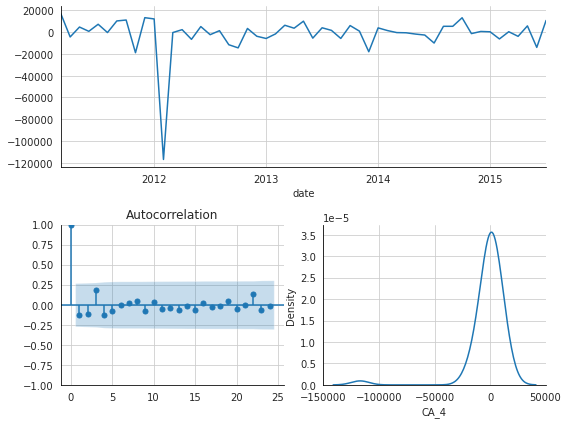

In [65]:
for i in range(len(state_id_list)):
    print("\n Store Name CA_"+str(i+1))
    residualcheck(resid_SARIMA["CA_"+str(i+1)],24);
    plt.show()

## Prophet Model

In [66]:
import os
import sys

# from https://stackoverflow.com/questions/11130156/suppress-stdout-stderr-print-from-python-functions
class suppress_stdout_stderr(object):
    '''
    A context manager for doing a "deep suppression" of stdout and stderr in
    Python, i.e. will suppress all print, even if the print originates in a
    compiled C/Fortran sub-function.
       This will not suppress raised exceptions, since exceptions are printed
    to stderr just before a script exits, and after the context manager has
    exited (at least, I think that is why it lets exceptions through).

    '''
    def __init__(self):
        # Open a pair of null files
        self.null_fds = [os.open(os.devnull, os.O_RDWR) for x in range(2)]
        # Save the actual stdout (1) and stderr (2) file descriptors.
        self.save_fds = (os.dup(1), os.dup(2))

    def __enter__(self):
        # Assign the null pointers to stdout and stderr.
        os.dup2(self.null_fds[0], 1)
        os.dup2(self.null_fds[1], 2)

    def __exit__(self, *_):
        # Re-assign the real stdout/stderr back to (1) and (2)
        os.dup2(self.save_fds[0], 1)
        os.dup2(self.save_fds[1], 2)
        # Close the null files
        os.close(self.null_fds[0])
        os.close(self.null_fds[1])


In [67]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

predicted_prophet_add=pd.DataFrame(columns=state_id_list)
fit_prophet_add=pd.DataFrame(columns=state_id_list)
resid_prophet_add=pd.DataFrame(columns=state_id_list)

predicted_prophet_mul=pd.DataFrame(columns=state_id_list)
fit_prophet_mul=pd.DataFrame(columns=state_id_list)
resid_prophet_mul=pd.DataFrame(columns=state_id_list)

In [68]:
prophetmodels=[]

In [72]:
from prophet import Prophet

In [73]:
for i in state_id_list:
    train_fb_prophet=Train[i].reset_index()
    train_fb_prophet.columns=["ds","y"]  ## Compulsary for prophet that dataframe is in this format.
    test_fb_prophet=Test[i].reset_index()
    test_fb_prophet.columns=["ds","y"]
    seasonality_mode=["multiplicative","additive"]
    for j in seasonality_mode:
        with suppress_stdout_stderr():
            prophet_model=Prophet(weekly_seasonality=False,
                                  daily_seasonality=False,
                                  yearly_seasonality=True,
                                  seasonality_mode=j).fit(train_fb_prophet)
        fb_dataframe=prophet_model.make_future_dataframe(len(Test),freq='MS',include_history=True)
        predicted_prophet=prophet_model.predict(fb_dataframe).set_index("ds")
        if j=="multiplicative":
            predicted_prophet_mul[i]=predicted_prophet[Test.index[0]:]["yhat"]
            fit_prophet_mul[i]=predicted_prophet[:Train.index[-1]]["yhat"]
            resid_prophet_mul[i]=Train[i]-fit_prophet_mul[i]
        else:
            predicted_prophet_add[i]=predicted_prophet[Test.index[0]:]["yhat"]
            fit_prophet_add[i]=predicted_prophet[:Train.index[-1]]["yhat"]
            resid_prophet_add[i]=Train[i]-fit_prophet_add[i]
            prophetmodels.append(prophet_model)


08:13:53 - cmdstanpy - INFO - Chain [1] start processing
08:13:54 - cmdstanpy - INFO - Chain [1] done processing
08:13:54 - cmdstanpy - INFO - Chain [1] start processing
08:13:55 - cmdstanpy - INFO - Chain [1] done processing
08:13:55 - cmdstanpy - INFO - Chain [1] start processing
08:13:55 - cmdstanpy - INFO - Chain [1] done processing
08:13:56 - cmdstanpy - INFO - Chain [1] start processing
08:13:56 - cmdstanpy - INFO - Chain [1] done processing
08:13:56 - cmdstanpy - INFO - Chain [1] start processing
08:13:57 - cmdstanpy - INFO - Chain [1] done processing
08:13:57 - cmdstanpy - INFO - Chain [1] start processing
08:13:58 - cmdstanpy - INFO - Chain [1] done processing
08:13:58 - cmdstanpy - INFO - Chain [1] start processing
08:13:59 - cmdstanpy - INFO - Chain [1] done processing
08:13:59 - cmdstanpy - INFO - Chain [1] start processing
08:13:59 - cmdstanpy - INFO - Chain [1] done processing


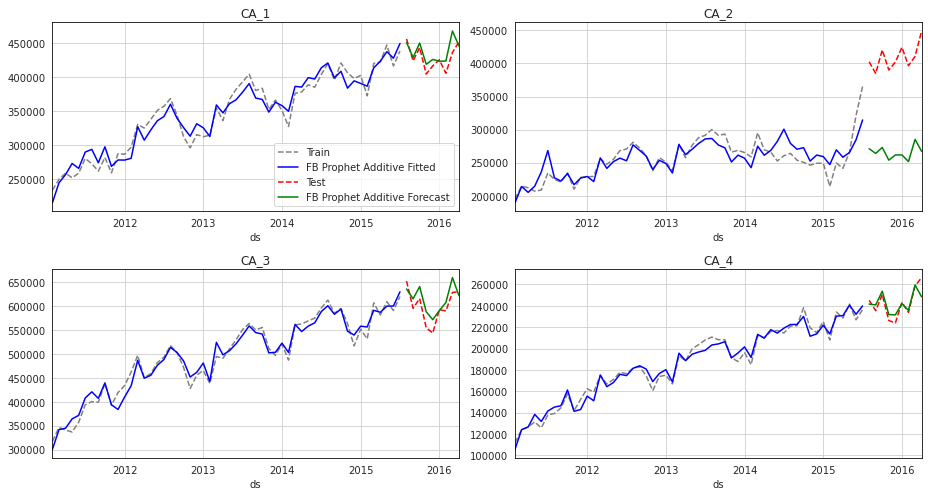

In [74]:
fig,ax=plt.subplots(figsize=(13,7),nrows=2,ncols=2)
for i, axs in enumerate(ax.flat):
    Train["CA_"+str(i+1)].plot(style="--", color="gray",legend=(i==0), label="Train",ax=axs).set_title(state_id_list[i])
    fit_prophet_add["CA_"+str(i+1)].dropna().plot(color="b",legend=(i==0) ,label="FB Prophet Additive Fitted",ax=axs)
    Test["CA_"+str(i+1)].plot(style="--",color="r", legend=(i==0),label="Test",ax=axs)
    predicted_prophet_add["CA_"+str(i+1)].plot(color="g",legend=(i==0) ,label="FB Prophet Additive Forecast",ax=axs)
fig.tight_layout()

In [75]:
for i in state_id_list:
    model_name="Prophet Additive"
    temp=pd.DataFrame({"store_id":i,
                  "Forecast Method":model_name,
                  "MAPE":accuracy(Test[i],predicted_prophet_add[i]).MAPE,
                  "RMSE":accuracy(Test[i],predicted_prophet_add[i]).RMSE})
    Model_Performance=pd.concat([Model_Performance,temp],axis=0,ignore_index=True)

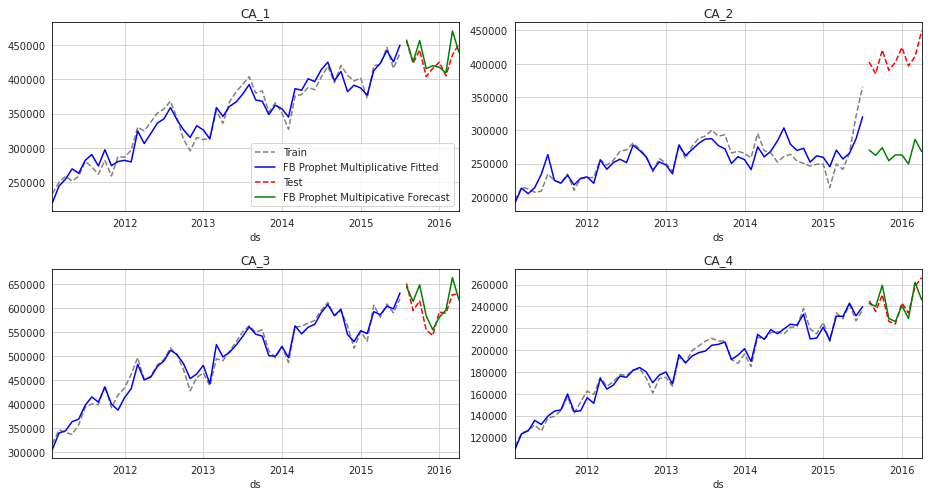

In [76]:
fig,ax=plt.subplots(figsize=(13,7),nrows=2,ncols=2)
for i, axs in enumerate(ax.flat):
    Train["CA_"+str(i+1)].plot(style="--", color="gray",legend=(i==0), label="Train",ax=axs).set_title(state_id_list[i])
    fit_prophet_mul["CA_"+str(i+1)].dropna().plot(color="b",legend=(i==0) ,label="FB Prophet Multiplicative Fitted",ax=axs)
    Test["CA_"+str(i+1)].plot(style="--",color="r", legend=(i==0),label="Test",ax=axs)
    predicted_prophet_mul["CA_"+str(i+1)].plot(color="g",legend=(i==0) ,label="FB Prophet Multipicative Forecast",ax=axs)
fig.tight_layout()

In [77]:
for i in state_id_list:
    model_name="Prophet Multiplicative"
    temp=pd.DataFrame({"store_id":i,
                  "Forecast Method":model_name,
                  "MAPE":accuracy(Test[i],predicted_prophet_mul[i]).MAPE,
                  "RMSE":accuracy(Test[i],predicted_prophet_mul[i]).RMSE})
    Model_Performance=pd.concat([Model_Performance,temp],axis=0,ignore_index=True)

In [78]:
Model_Performance

,store_id,Forecast Method,MAPE,RMSE
0,CA_1,SARIMA,3.8,18787.2
1,CA_2,SARIMA,13.9,62055.6
2,CA_3,SARIMA,2.7,19955.4
3,CA_4,SARIMA,3.4,9538.2
4,CA_1,Prophet Additive,2.6,14021.4
5,CA_2,Prophet Additive,35.0,144694.8
6,CA_3,Prophet Additive,3.4,22460.4
7,CA_4,Prophet Additive,2.1,7226.9
8,CA_1,Prophet Multiplicative,2.4,14155.0
9,CA_2,Prophet Multiplicative,35.0,144466.1


FB Prophet model captures trend and seasonality quite well.

For CA4 it is the second best model.

For CA2, the model was not able to capture sudden increase and the accuracy is quite low.

For CA1 and CA3, the model is in the middle when we rank according to RMSE.

There is not much difference in accuracy for different seasonality modes for our time series data.


 Store Name CA_1
** Mean of the residuals:  0.76

** Ljung Box Test, p-value: 1.114434472586736e-06 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.179 (>0.05, Normal)

** AD Fuller, p_value: 0.0005386278655261327 (<0.05, Stationary)


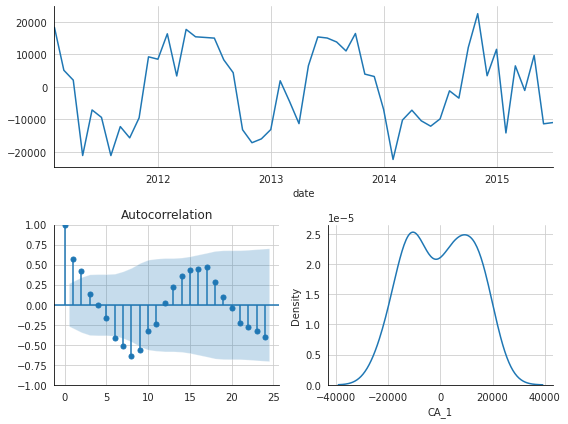


 Store Name CA_2
** Mean of the residuals:  0.23

** Ljung Box Test, p-value: 3.320231496929887e-05 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.147 (>0.05, Normal)

** AD Fuller, p_value: 0.0012663867593941942 (<0.05, Stationary)


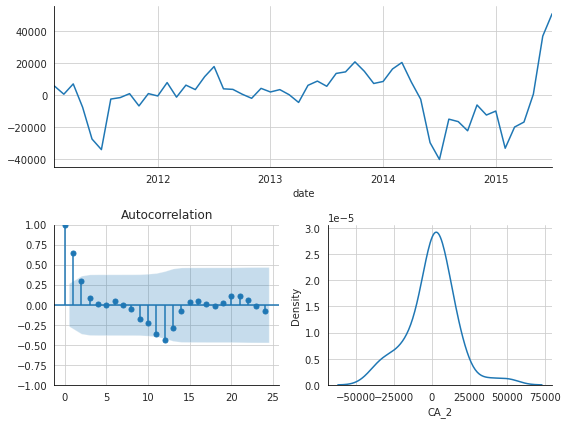


 Store Name CA_3
** Mean of the residuals:  0.52

** Ljung Box Test, p-value: 0.0003728793901481295 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.984 (>0.05, Normal)

** AD Fuller, p_value: 0.005004366689563462 (<0.05, Stationary)


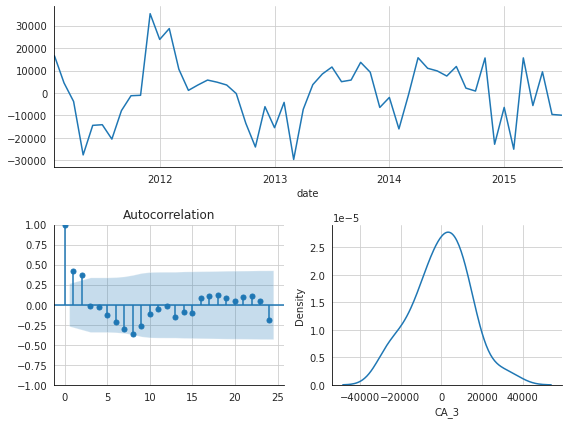


 Store Name CA_4
** Mean of the residuals:  -1.35

** Ljung Box Test, p-value: 2.956064340202505e-06 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.387 (>0.05, Normal)

** AD Fuller, p_value: 0.00034556320086285316 (<0.05, Stationary)


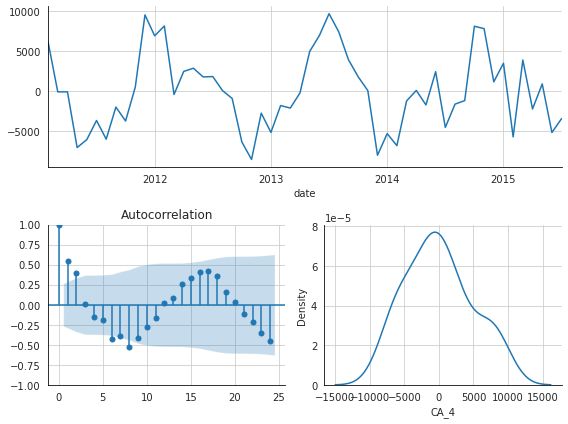

In [79]:
for i in range(len(state_id_list)):
    print("\n Store Name CA_"+str(i+1))
    residualcheck(resid_prophet_add["CA_"+str(i+1)],24);
    plt.show()


 Store Name CA_1
** Mean of the residuals:  13.82

** Ljung Box Test, p-value: 1.2161302935879272e-07 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.205 (>0.05, Normal)

** AD Fuller, p_value: 0.000623058184798761 (<0.05, Stationary)


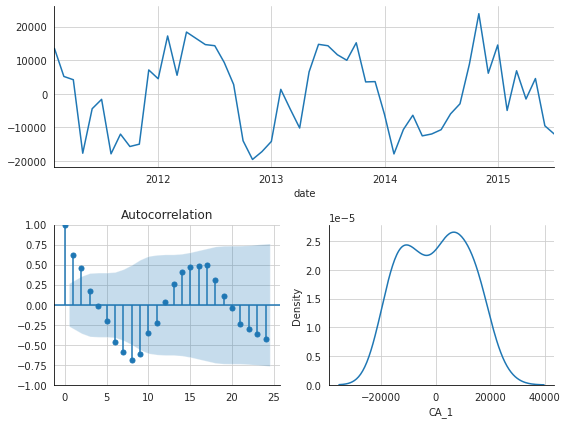


 Store Name CA_2
** Mean of the residuals:  21.78

** Ljung Box Test, p-value: 1.82212209634207e-05 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.279 (>0.05, Normal)

** AD Fuller, p_value: 0.06133436526462532 (>0.05, Non-stationary)


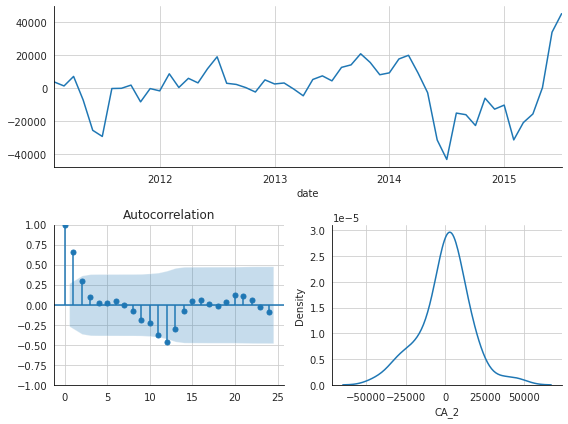


 Store Name CA_3
** Mean of the residuals:  19.04

** Ljung Box Test, p-value: 0.002164210710636058 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.789 (>0.05, Normal)

** AD Fuller, p_value: 0.014561938938793213 (<0.05, Stationary)


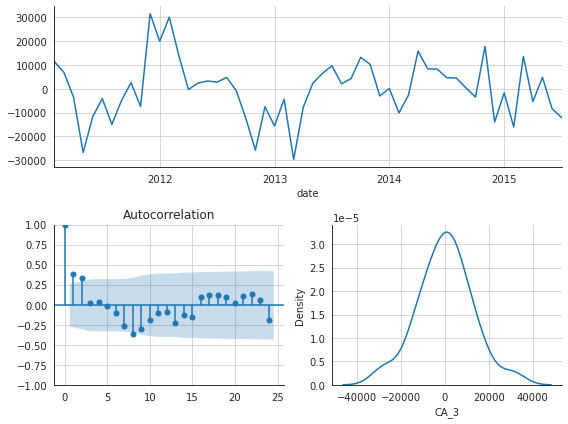


 Store Name CA_4
** Mean of the residuals:  5.98

** Ljung Box Test, p-value: 1.6713832566847743e-07 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.557 (>0.05, Normal)

** AD Fuller, p_value: 0.0001913087834590415 (<0.05, Stationary)


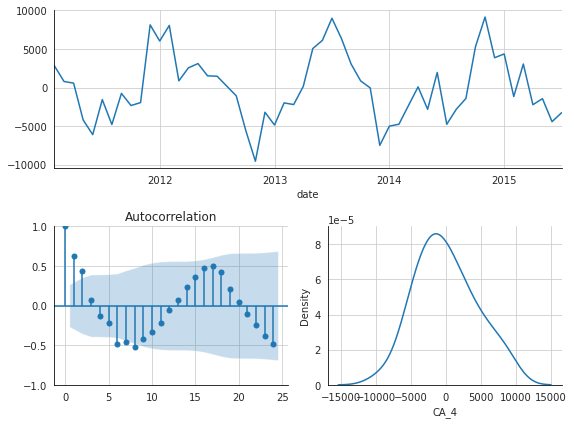

In [81]:
for i in range(len(state_id_list)):
    print("\n Store Name CA_"+str(i+1))
    residualcheck(resid_prophet_mul["CA_"+str(i+1)],24);
    plt.show()

## Summary Best Model

Performance of various models for each stores. We will plot the predicted values of different model and also actual value for different stores

In [84]:
from cycler import cycler

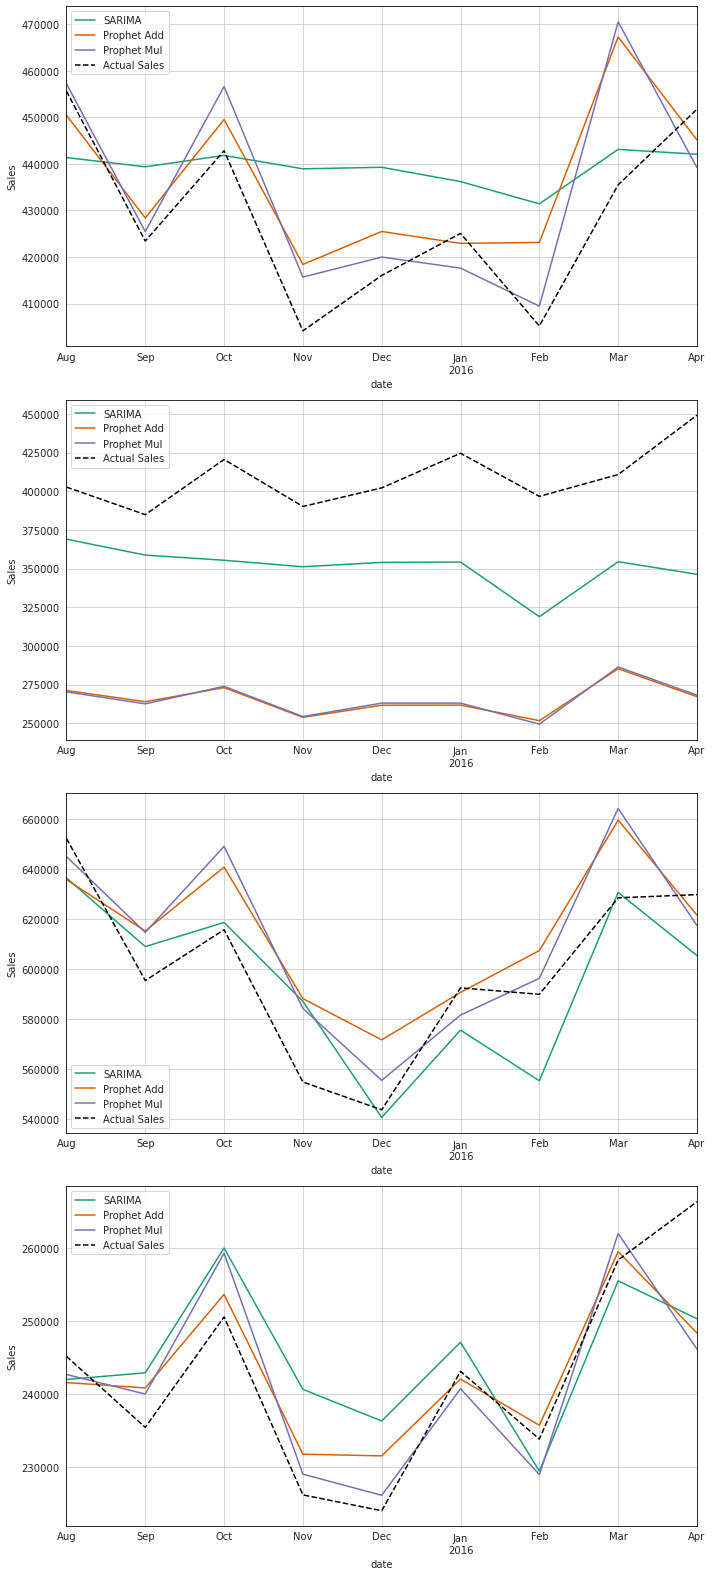

In [86]:
fig,axs=plt.subplots(figsize=(10,22),nrows=4,ncols=1)
for j,i in enumerate(state_id_list):   
    axs[j].set_prop_cycle(cycler('color', plt.cm.Dark2.colors))
    predicted_SARIMA[i].plot(legend=True, label="SARIMA",ax=axs[j])
    predicted_prophet_add[i].plot(legend=True, label="Prophet Add",ax=axs[j])
    predicted_prophet_mul[i].plot(legend=True, label="Prophet Mul",ax=axs[j])
    Test[i].plot(color="black",label="Actual Sales",style="--",legend=True,ax=axs[j])
    axs[j].set_ylabel("Sales")
    axs[j].grid(which='minor')
fig.tight_layout()